# Easy Money - Modelo de propensi√≥n a compra

Mensaje de Carol: Una vez que hayamos hecho el an√°lisis de nuestra BBDD nos gustar√≠a poder vender m√°s y mejor nuestros productos, s√© que los data scientist tienen una ‚Äúbola de cristal‚Äù y saben qu√© clientes son m√°s propensos a comprar nuestros productos as√≠ que te pido por favor hagas un modelo de propensi√≥n a compra, se que tenemos muchos productos, as√≠ que te dejo a tu criterio cient√≠fico qu√© productos elegir, o pueden ser varios, ya me sorprender√°s

Vamos a desarrollar un modelo capaz de **predecir si un cliente es propenso a contratar un producto de Easy Money, teniendo en cuenta sus caracter√≠sticas**.

## Importaci√≥n de librer√≠as

In [1]:
# Importamos las librerias necesarias.
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OrdinalEncoder
from sklearn import model_selection 
from sklearn import metrics
from sklearn.model_selection import train_test_split

## Importaci√≥n de datos

De las tablas que tenemos disponibles en BBDD, las que ser√°n de utilidad para este modelo son customer_sociodemographics, customer_commercial_activity. 
<p>Guardamos los datos de las tablas en dataframes distintos que limpiaremos, y posteriormente uniremos en un √∫nico dataframe 


In [2]:
# Obtener el directorio de trabajo actual
current_dir = os.getcwd()

# Ir a la carpeta anterior del directorio actual porque ah√≠ se encuentra la carpeta 'data' donde est√°n todos los ficheros .csv
parent_dir = os.path.dirname(current_dir)

DATA_PATH = os.path.join(parent_dir, 'data/') # Ruta donde est√°n los ficheros .csv

FILE_NAME1 = 'customer_sociodemographics.csv'
FILE1 = os.path.join(DATA_PATH, FILE_NAME1)

FILE_NAME2 = 'customer_commercial_activity.csv'
FILE2 = os.path.join(DATA_PATH, FILE_NAME2)

print('current path:', current_dir)
print('parent path:', parent_dir)
print('data path:', DATA_PATH)
print('file 1:', FILE1)
print('file 2:', FILE2)
print('data path:', DATA_PATH)

current path: c:\Users\odoto\Documents\Nuclio\TFM-EasyMoney\Dataframe_modelo
parent path: c:\Users\odoto\Documents\Nuclio\TFM-EasyMoney
data path: c:\Users\odoto\Documents\Nuclio\TFM-EasyMoney\data/
file 1: c:\Users\odoto\Documents\Nuclio\TFM-EasyMoney\data/customer_sociodemographics.csv
file 2: c:\Users\odoto\Documents\Nuclio\TFM-EasyMoney\data/customer_commercial_activity.csv
data path: c:\Users\odoto\Documents\Nuclio\TFM-EasyMoney\data/


In [3]:
df_cs = pd.read_csv(FILE1, index_col=0)
df_cca = pd.read_csv(FILE2, index_col=0)

## 1: Data Understanding

### 1.1: An√°lisis Univariante de datos de las distintos datasets que vamos a usar

#### 1.1.1 Analizamos la tabla customer_sociodemographics

In [4]:
# Datos generales 

df_cs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 0 to 13647308
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   pk_cid        int64  
 1   pk_partition  object 
 2   country_id    object 
 3   region_code   float64
 4   gender        object 
 5   age           int64  
 6   deceased      object 
 7   salary        float64
dtypes: float64(2), int64(2), object(4)
memory usage: 409.4+ MB


In [5]:
# Visualizaci√≥n de los datos
df_cs.head()

pk_cid pk_partition country_id  region_code gender  age deceased  \
0  1375586      2018-01         ES         29.0      H   35        N   
1  1050611      2018-01         ES         13.0      V   23        N   
2  1050612      2018-01         ES         13.0      V   23        N   
3  1050613      2018-01         ES         50.0      H   22        N   
4  1050614      2018-01         ES         50.0      V   23        N   

      salary  
0   87218.10  
1   35548.74  
2  122179.11  
3  119775.54  
4        NaN

In [6]:
# Recuento de nulos 

df_cs.isna().sum()

pk_cid                0
pk_partition          0
country_id            0
region_code        2264
gender               25
age                   0
deceased              0
salary          1541104
dtype: int64

De entrada, analizamos la columna "deceased" para eliminar los clientes fallecidos y quedarnos con aquellos que actualmente son reales

In [7]:
df_cs['deceased'].value_counts()

deceased
N    5961849
S       1075
Name: count, dtype: int64

In [8]:
df_cs = df_cs[(df_cs['deceased']  == 'N')]
df_cs['deceased'].value_counts()

deceased
N    5961849
Name: count, dtype: int64

Ahora que nos hemos quedado solamente con los clientes no fallecidos, esta columna no es de mucha utilidad ya que siempre tiene el mismo valor. La podemos eliminar.

In [9]:
del(df_cs['deceased'])

Analizamos tambi√©n la columna country_id para ver si vale la pena quedarnos con todos los pa√≠ses de la BBDD 

In [10]:
df_cs['country_id'].value_counts()

country_id
ES    5959602
GB        441
FR        225
DE        199
US        195
CH        189
BR         87
BE         81
VE         79
IE         68
MX         58
AT         51
AR         51
PL         49
IT         45
MA         34
CL         30
CN         28
CA         22
LU         17
ET         17
QA         17
CI         17
SA         17
CM         17
SN         17
MR         17
NO         17
RU         17
CO         17
GA         17
GT         17
DO         17
SE         16
DJ         11
PT         11
JM         11
RO          9
HU          8
DZ          7
PE          4
Name: count, dtype: int64

Vemos que los valores de los pa√≠ses distintos a ES son muy peque√±os y no aportar√°n demasiado valor a nuestro modelo. Nos quedamos solamente con los registros que son country_id = ES

In [11]:
df_cs = df_cs[(df_cs['country_id']  == 'ES')]
df_cs['country_id'].value_counts()

country_id
ES    5959602
Name: count, dtype: int64

Ahora que nos hemos quedado solamente con los clientes de ES, esta columna no es de mucha utilidad ya que siempre tiene el mismo valor. La podemos eliminar.

In [12]:
del(df_cs['country_id'])

Seg√∫n el diccionario de las tablas, region_code es el c√≥digo de provincia. Este dato s√≠ puede ser relevante, pero vemos que tiene nulos. Como estamos ante un modelo de clasificaci√≥n binaria, podemos rellenar los nulos con un valor como -1, para que se sean agrupados en un bloque propio.

In [13]:
df_cs['region_code'].fillna(-1, inplace=True)

C:\Users\odoto\AppData\Local\Temp\ipykernel_13072\1372854579.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cs['region_code'].fillna(-1, inplace=True)


La columna gender tambi√©n ten√≠a nulos, pero son muy pocos en relaci√≥n al total del dataset. Analizamos cu√°ntos nulos quedan despu√©s de los cambios ya realizados y elimnamos estas filas por ser muy pocas

In [14]:
df_cs['gender'].isna().sum()

25

In [15]:
df_cs = df_cs.dropna(subset =['gender'])

Analizamos la columna salary 

In [16]:
df_cs['salary'].value_counts()

salary
451931.22    709
288997.44    546
135522.15    466
128318.52    458
104563.80    436
            ... 
127111.23      1
100303.05      1
125135.46      1
188185.68      1
167276.64      1
Name: count, Length: 257626, dtype: int64

In [17]:
df_cs['salary'].describe()

count    4.420911e+06
mean     1.155810e+05
std      2.000189e+05
min      1.202730e+03
25%      6.141354e+04
50%      8.843742e+04
75%      1.313081e+05
max      2.889440e+07
Name: salary, dtype: float64

Vemos que todos los valores son positivos, que la diferencia entre el salario mayor y el salario menor es muy grande, y que la media por tanto es muy elevada tambi√©n. Igualmente, seg√∫n el diccionario de la BBDD, se trata del salario de la unidad familiar y consideramos que este valor es importante a la hora de determinar la contrataci√≥n. Al haber muchos nulos, y al ser el modelo de clasificaci√≥n binaria, vamos a asignar a los nulos el valor -1

In [18]:
df_cs['salary'].fillna(-1, inplace=True)

C:\Users\odoto\AppData\Local\Temp\ipykernel_13072\3059662271.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cs['salary'].fillna(-1, inplace=True)


Transformamos la columna region_code de float a int

In [19]:
df_cs["region_code"] = df_cs["region_code"].astype(int)

Transformamos la columna pk_partition a fecha

In [20]:
df_cs["pk_partition"] = pd.to_datetime(df_cs["pk_partition"])


Finalmente, la tabla de customer_sociodemographics quedar√° as√≠:

In [21]:
df_cs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5959577 entries, 0 to 13647308
Data columns (total 6 columns):
 #   Column        Dtype         
---  ------        -----         
 0   pk_cid        int64         
 1   pk_partition  datetime64[ns]
 2   region_code   int32         
 3   gender        object        
 4   age           int64         
 5   salary        float64       
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(1)
memory usage: 295.5+ MB


#### 1.1.2 Analizamos la tabla customer_commercial_activity

In [22]:
# Datos generales 

df_cca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 0 to 13647308
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   pk_cid           int64  
 1   pk_partition     object 
 2   entry_date       object 
 3   entry_channel    object 
 4   active_customer  float64
 5   segment          object 
dtypes: float64(1), int64(1), object(4)
memory usage: 318.5+ MB


In [23]:
# Visualizaci√≥n de los datos
df_cca.head()

pk_cid pk_partition entry_date entry_channel  active_customer  \
0  1375586      2018-01    2018-01           KHL              1.0   
1  1050611      2018-01    2015-08           KHE              0.0   
2  1050612      2018-01    2015-08           KHE              0.0   
3  1050613      2018-01    2015-08           KHD              0.0   
4  1050614      2018-01    2015-08           KHE              1.0   

              segment  
0   02 - PARTICULARES  
1  03 - UNIVERSITARIO  
2  03 - UNIVERSITARIO  
3  03 - UNIVERSITARIO  
4  03 - UNIVERSITARIO

In [24]:
# Recuento de nulos 

df_cca.isna().sum()

pk_cid                  0
pk_partition            0
entry_date              0
entry_channel      133033
active_customer         0
segment            133944
dtype: int64

In [25]:
pd.set_option('display.max_rows', 100)

In [26]:
df_cca['entry_channel'].value_counts(normalize = True)*100

entry_channel
KHE    53.413469
KFC    15.276786
KHQ    10.125061
KAT     7.137080
KHK     3.948564
KHM     3.029062
KHN     1.859966
KFA     1.355428
KHD     1.301894
RED     1.039488
KHL     0.715897
KHF     0.354329
KHO     0.141461
KAZ     0.096657
KHC     0.089899
KBG     0.028508
KEH     0.012487
KHP     0.011853
007     0.010515
013     0.006810
KAG     0.005746
KAS     0.005232
KBZ     0.003396
KAA     0.003311
KAR     0.002693
KAY     0.002556
KAF     0.002110
KAB     0.001630
KFD     0.001561
KCC     0.001527
KAW     0.001115
KAQ     0.000892
KDH     0.000875
KAE     0.000823
KCH     0.000823
KCB     0.000806
KAD     0.000772
KAM     0.000738
KAH     0.000686
KAK     0.000583
KAJ     0.000566
KDT     0.000395
KFF     0.000377
KBO     0.000360
KEY     0.000343
KGC     0.000292
004     0.000292
KFS     0.000292
KCL     0.000292
KBE     0.000292
KBH     0.000292
KFK     0.000292
KGN     0.000292
KCI     0.000292
KGX     0.000292
KDR     0.000274
KFL     0.000223
KBW     0.000206


Vemos muchos valores de Entry Channel que son muy pocos en comparaci√≥n con los valores mayoritarios. Elegimos los canales de entrada que tengan una proporci√≥n mayor al 1% y agrupamos el resto en Others

In [27]:
value_counts = (df_cca['entry_channel'].value_counts(normalize = True, dropna=True)*100)
df_cca['entry_channel'] = df_cca['entry_channel'].apply(lambda x: x if pd.isna(x) or value_counts.get(x, 0) >= 1 else 'Others')

In [28]:
df_cca['entry_channel'].value_counts(normalize = True)*100

entry_channel
KHE       53.413469
KFC       15.276786
KHQ       10.125061
KAT        7.137080
KHK        3.948564
KHM        3.029062
KHN        1.859966
Others     1.513202
KFA        1.355428
KHD        1.301894
RED        1.039488
Name: proportion, dtype: float64

Analizamos la columna segment para ver los valores √∫nicos, sabiendo que tambi√©n tiene nulos

In [29]:
df_cca['segment'].value_counts()

segment
03 - UNIVERSITARIO    3900166
02 - PARTICULARES     1830875
01 - TOP                97939
Name: count, dtype: int64

Rellenamos NaN de channel y segment con un valor identificativo como 'Not defined'

In [30]:
df_cca["entry_channel"].fillna('Not defined', inplace=True)
df_cca["segment"].fillna('Not defined', inplace=True)

C:\Users\odoto\AppData\Local\Temp\ipykernel_13072\2969524961.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cca["entry_channel"].fillna('Not defined', inplace=True)
C:\Users\odoto\AppData\Local\Temp\ipykernel_13072\2969524961.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [31]:
df_cca.isna().sum()

pk_cid             0
pk_partition       0
entry_date         0
entry_channel      0
active_customer    0
segment            0
dtype: int64

In [32]:
df_cca['active_customer'].value_counts()

active_customer
0.0    3557573
1.0    2405351
Name: count, dtype: int64

Transformarmos active_customer de float a int

In [33]:
df_cca["active_customer"] = df_cca["active_customer"].astype(int)

Transformamos las columna pk_partition y entry_date a fecha

In [34]:
df_cca["pk_partition"] = pd.to_datetime(df_cca["pk_partition"])
df_cca["entry_date"] = pd.to_datetime(df_cca["entry_date"])

Eliminamos la columna de entry_date ya que la fecha que nos interesa realmente es la fecha de venta dela tabla sales

In [35]:
del(df_cca['entry_date'])

Finalmente, la tabla de customer_commercial_activity quedar√° as√≠:

In [36]:
df_cca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 0 to 13647308
Data columns (total 5 columns):
 #   Column           Dtype         
---  ------           -----         
 0   pk_cid           int64         
 1   pk_partition     datetime64[ns]
 2   entry_channel    object        
 3   active_customer  int32         
 4   segment          object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(2)
memory usage: 250.2+ MB


## 2: Construcci√≥n del dataset para el modelo

Vamos a hacer un inner merge de todos los datasets, ya que nos interesa agrupar toda la informaci√≥n analizada en un √∫nico dataframe, que contenga toda la informaci√≥n por el id de cliente.

In [37]:
df_merged = pd.merge(
    left = df_cca, 
    right = df_cs,
    on = ('pk_cid', 'pk_partition'),
    how = 'inner')

In [38]:
df_merged.head()

pk_cid pk_partition entry_channel  active_customer             segment  \
0  1375586   2018-01-01        Others                1   02 - PARTICULARES   
1  1050611   2018-01-01           KHE                0  03 - UNIVERSITARIO   
2  1050612   2018-01-01           KHE                0  03 - UNIVERSITARIO   
3  1050613   2018-01-01           KHD                0  03 - UNIVERSITARIO   
4  1050614   2018-01-01           KHE                1  03 - UNIVERSITARIO   

   region_code gender  age     salary  
0           29      H   35   87218.10  
1           13      V   23   35548.74  
2           13      V   23  122179.11  
3           50      H   22  119775.54  
4           50      V   23      -1.00

In [39]:
pd.set_option('display.max_rows', 1000)

Cargamos un csv corresopndiente a las compras de pension plan, donde tendr√° para cada pk_cid un valor de 1 el mes de su compra y 0 para tenencia o cancelaci√≥n.

In [40]:

print(DATA_PATH)

df_con_reg = pd.read_csv(os.path.join(DATA_PATH, 'reg_pension_plan.csv'), sep = ';', low_memory=False, index_col=0)

c:\Users\odoto\Documents\Nuclio\TFM-EasyMoney\data/


In [41]:
df_con_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1048575 entries, 15891 to 1079479
Data columns (total 2 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   pk_partition      1048575 non-null  object
 1   reg_pension_plan  1048575 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 24.0+ MB


In [42]:
df_con_reg.head()

pk_partition  reg_pension_plan
pk_cid                               
15891    01/07/2018                 0
15891    01/08/2018                 0
16063    01/11/2018                 0
16063    01/12/2018                 0
16063    01/01/2019                 0

In [43]:
df_con_reg['pk_partition'] = pd.to_datetime(df_con_reg['pk_partition'], format = '%d/%m/%Y' )

In [44]:
df_con_reg.head()

pk_partition  reg_pension_plan
pk_cid                               
15891    2018-07-01                 0
15891    2018-08-01                 0
16063    2018-11-01                 0
16063    2018-12-01                 0
16063    2019-01-01                 0

In [45]:
df_con_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1048575 entries, 15891 to 1079479
Data columns (total 2 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   pk_partition      1048575 non-null  datetime64[ns]
 1   reg_pension_plan  1048575 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 24.0 MB


Hacemos merge con el df de los datos de cliente y la compra del pensi√≥n plan, uniendo con un inner por pk_cid y pk_partition.

In [46]:
df_con_reg_merged = pd.merge(
    left = df_merged, 
    right = df_con_reg,
    on = ('pk_cid', 'pk_partition'),
    how = 'inner')

In [47]:
df_con_reg_merged.head(50)

pk_cid pk_partition entry_channel  active_customer             segment  \
0   1050611   2018-01-01           KHE                0  03 - UNIVERSITARIO   
1   1050612   2018-01-01           KHE                0  03 - UNIVERSITARIO   
2   1050613   2018-01-01           KHD                0  03 - UNIVERSITARIO   
3   1050614   2018-01-01           KHE                1  03 - UNIVERSITARIO   
4   1050615   2018-01-01           KHE                0  03 - UNIVERSITARIO   
5   1050616   2018-01-01           KHE                0  03 - UNIVERSITARIO   
6   1050617   2018-01-01           KHE                1  03 - UNIVERSITARIO   
7   1050619   2018-01-01           KHE                0  03 - UNIVERSITARIO   
8   1050620   2018-01-01           KHE                0  03 - UNIVERSITARIO   
9   1050621   2018-01-01           KHE                0  03 - UNIVERSITARIO   
10  1050622   2018-01-01           KHE                0  03 - UNIVERSITARIO   
11  1050623   2018-01-01           KHE                1  03 - UNIVERSITARIO   
12  1050624   2018-01-01           KHE                1   02 - PARTICULARES   
13  1050625   2018-01-01           KHE                1  03 - UNIVERSITARIO   
14  1050626   2018-01-01           KHE                1  03 - UNIVERSITARIO   
15  1050610   2018-01-01           KHE                1  03 - UNIVERSITARIO   
16  1050627   2018-01-01           KHE                0  03 - UNIVERSITARIO   
17  1050609   2018-01-01           KFA                1  03 - UNIVERSITARIO   
18  1050605   2018-01-01           KHE                0  03 - UNIVERSITARIO   
19  1050582   2018-01-01           KHE                1  03 - UNIVERSITARIO   
20  1050586   2018-01-01           KHE                1  03 - UNIVERSITARIO   
21  1050588   2018-01-01           KHE                1  03 - UNIVERSITARIO   
22  1050589   2018-01-01           KHE                0  03 - UNIVERSITARIO   
23  1050591   2018-01-01           KHE                1  03 - UNIVERSITARIO   
24  1050592   2018-01-01           KHD                0  03 - UNIVERSITARIO   
25  1050595   2018-01-01           KHE                1  03 - UNIVERSITARIO   
26  1050596   2018-01-01           KHE                1  03 - UNIVERSITARIO   
27  1050597   2018-01-01           KHE                0  03 - UNIVERSITARIO   
28  1050598   2018-01-01           KHE                1  03 - UNIVERSITARIO   
29  1050599   2018-01-01           KHE                0  03 - UNIVERSITARIO   
30  1050601   2018-01-01           KHE                0  03 - UNIVERSITARIO   
31  1050602   2018-01-01           KHE                1  03 - UNIVERSITARIO   
32  1050603   2018-01-01           KHE                1  03 - UNIVERSITARIO   
33  1050604   2018-01-01           KHE                0   02 - PARTICULARES   
34  1050607   2018-01-01           KHE                0  03 - UNIVERSITARIO   
35  1050580   2018-01-01           KHE                1  03 - UNIVERSITARIO   
36  1050628   2018-01-01           KHE                0  03 - UNIVERSITARIO   
37  1050630   2018-01-01           KHD                0  03 - UNIVERSITARIO   
38  1050669   2018-01-01           KFC                1   02 - PARTICULARES   
39  1050670   2018-01-01           KFC                1   02 - PARTICULARES   
40  1050676   2018-01-01           KFC                0   02 - PARTICULARES   
41  1050679   2018-01-01           KFC                1   02 - PARTICULARES   
42  1050680   2018-01-01           KFC                0   02 - PARTICULARES   
43  1050686   2018-01-01           KFC                1   02 - PARTICULARES   
44  1050688   2018-01-01           KFC                1   02 - PARTICULARES   
45  1050693   2018-01-01           KFC                0   02 - PARTICULARES   
46  1050694   2018-01-01           KFC                1  03 - UNIVERSITARIO   
47  1050697   2018-01-01           KFC                1   02 - PARTICULARES   
48  1050703   2018-01-01           KHE                0  03 - UNIVERSITARIO   
49  1050704   2018-01-01           KHE                0

## Creamos datasets con compras y no compras de pension plan

In [48]:
df_con_reg_merged 

pk_cid pk_partition entry_channel  active_customer  \
0        1050611   2018-01-01           KHE                0   
1        1050612   2018-01-01           KHE                0   
2        1050613   2018-01-01           KHD                0   
3        1050614   2018-01-01           KHE                1   
4        1050615   2018-01-01           KHE                0   
...          ...          ...           ...              ...   
1047514  1018682   2019-05-01           KAT                0   
1047515  1018679   2019-05-01           KFA                1   
1047516  1018676   2019-05-01           KFA                0   
1047517  1018675   2019-05-01           KFC                0   
1047518  1018723   2019-05-01           KFC                0   

                    segment  region_code gender  age     salary  \
0        03 - UNIVERSITARIO           13      V   23   35548.74   
1        03 - UNIVERSITARIO           13      V   23  122179.11   
2        03 - UNIVERSITARIO           50      H   22  119775.54   
3        03 - UNIVERSITARIO           50      V   23      -1.00   
4        03 - UNIVERSITARIO           45      H   23   22220.04   
...                     ...          ...    ...  ...        ...   
1047514   02 - PARTICULARES           28      V   88   35310.57   
1047515   02 - PARTICULARES           28      V   34   61180.11   
1047516   02 - PARTICULARES           28      H   74   63867.48   
1047517   02 - PARTICULARES           29      H   15      -1.00   
1047518   02 - PARTICULARES           43      V   42      -1.00   

         reg_pension_plan  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  
...                   ...  
1047514                 0  
1047515                 0  
1047516                 0  
1047517                 0  
1047518                 0  

[1047519 rows x 10 columns]

In [49]:
pension_plan_purch = df_con_reg_merged.loc[(df_con_reg_merged['reg_pension_plan'] == 1)]

In [50]:
pension_plan_purch

pk_cid pk_partition entry_channel  active_customer  \
71       1050659   2018-01-01           KFC                1   
120      1050565   2018-01-01           KHE                1   
140      1050537   2018-01-01           KHE                1   
186      1050869   2018-01-01           KHE                1   
222      1050920   2018-01-01           KHE                1   
...          ...          ...           ...              ...   
1046941  1017759   2019-05-01           KFC                1   
1046944  1017752   2019-05-01           KFA                1   
1047276  1019074   2019-05-01           KAT                1   
1047442  1018802   2019-05-01           KAT                1   
1047487  1018600   2019-05-01           KFC                1   

                    segment  region_code gender  age     salary  \
71        02 - PARTICULARES            7      V   39      -1.00   
120      03 - UNIVERSITARIO           46      H   33   54141.03   
140      03 - UNIVERSITARIO           50      H   23  214309.14   
186      03 - UNIVERSITARIO           28      V   31   45758.82   
222      03 - UNIVERSITARIO           46      H   25      -1.00   
...                     ...          ...    ...  ...        ...   
1046941  03 - UNIVERSITARIO           28      H   24      -1.00   
1046944   02 - PARTICULARES           28      V   29   78061.95   
1047276   02 - PARTICULARES            8      H   40  237887.46   
1047442  03 - UNIVERSITARIO           28      H   27  219826.11   
1047487   02 - PARTICULARES           29      V   34  133387.23   

         reg_pension_plan  
71                      1  
120                     1  
140                     1  
186                     1  
222                     1  
...                   ...  
1046941                 1  
1046944                 1  
1047276                 1  
1047442                 1  
1047487                 1  

[7660 rows x 10 columns]

In [51]:
pension_plan_no_purch = df_con_reg_merged.loc[(df_con_reg_merged['reg_pension_plan'] == 0)]

In [52]:
pension_plan_no_purch 

pk_cid pk_partition entry_channel  active_customer  \
0        1050611   2018-01-01           KHE                0   
1        1050612   2018-01-01           KHE                0   
2        1050613   2018-01-01           KHD                0   
3        1050614   2018-01-01           KHE                1   
4        1050615   2018-01-01           KHE                0   
...          ...          ...           ...              ...   
1047514  1018682   2019-05-01           KAT                0   
1047515  1018679   2019-05-01           KFA                1   
1047516  1018676   2019-05-01           KFA                0   
1047517  1018675   2019-05-01           KFC                0   
1047518  1018723   2019-05-01           KFC                0   

                    segment  region_code gender  age     salary  \
0        03 - UNIVERSITARIO           13      V   23   35548.74   
1        03 - UNIVERSITARIO           13      V   23  122179.11   
2        03 - UNIVERSITARIO           50      H   22  119775.54   
3        03 - UNIVERSITARIO           50      V   23      -1.00   
4        03 - UNIVERSITARIO           45      H   23   22220.04   
...                     ...          ...    ...  ...        ...   
1047514   02 - PARTICULARES           28      V   88   35310.57   
1047515   02 - PARTICULARES           28      V   34   61180.11   
1047516   02 - PARTICULARES           28      H   74   63867.48   
1047517   02 - PARTICULARES           29      H   15      -1.00   
1047518   02 - PARTICULARES           43      V   42      -1.00   

         reg_pension_plan  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  
...                   ...  
1047514                 0  
1047515                 0  
1047516                 0  
1047517                 0  
1047518                 0  

[1039859 rows x 10 columns]

Queremos utilizar las fechas del dataset pension_plan_purch anteriores para montar el dataset final con los datos de clientes.
Ya hemos identificado los 1, solo queremos las fechas. 
Cuando tengamos las fechas, podemos ir a los no-purch y sacar los datos anteriores a esas fechas (datetime).
De aqu√≠ tendremos clientes que han comprado pero con su comportamiento o descripci√≥n el mes anterior a la compra.




In [53]:
# Creamos una nueva columna con los datos de la pk_partition del mes anterior a la compra desde el data frame de purchase
pension_plan_purch['pk_part_prev_month'] = pension_plan_purch['pk_partition'] - pd.DateOffset(months=1)

C:\Users\odoto\AppData\Local\Temp\ipykernel_13072\459634169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pension_plan_purch['pk_part_prev_month'] = pension_plan_purch['pk_partition'] - pd.DateOffset(months=1)


In [54]:
pension_plan_purch.head()

pk_cid pk_partition entry_channel  active_customer             segment  \
71   1050659   2018-01-01           KFC                1   02 - PARTICULARES   
120  1050565   2018-01-01           KHE                1  03 - UNIVERSITARIO   
140  1050537   2018-01-01           KHE                1  03 - UNIVERSITARIO   
186  1050869   2018-01-01           KHE                1  03 - UNIVERSITARIO   
222  1050920   2018-01-01           KHE                1  03 - UNIVERSITARIO   

     region_code gender  age     salary  reg_pension_plan pk_part_prev_month  
71             7      V   39      -1.00                 1         2017-12-01  
120           46      H   33   54141.03                 1         2017-12-01  
140           50      H   23  214309.14                 1         2017-12-01  
186           28      V   31   45758.82                 1         2017-12-01  
222           46      H   25      -1.00                 1         2017-12-01

In [55]:
pension_plan_purch.shape

(7660, 11)

Reducimos el pension_plan_purch a los datos de pk_cid y fecha de partici√≥n del mes anterior a la compra. Nos servir√° m√°s adelante para conocer qu√© caracter√≠sticas tiene un cliente en este mes antes de comprar.

In [56]:
pension_plan_purch = pension_plan_purch[['pk_cid', 'pk_part_prev_month']]

Habiendo obtenido el dataframe con los clientes que compran y el pk_partition_del mes anterior a la compra, queremos sacar los datos de estos clientes para la fecha del mes anterior a la compra, para saber que caracter√≠sticas tenian.

In [57]:
# Mergeamos por pk_cid y pk_partition del mes anterior a compra con el dataframe de las no compras

df_customers_purchased = pd.merge(
    left = pension_plan_purch, 
    right = pension_plan_no_purch, 
    left_on = ('pk_cid', 'pk_part_prev_month'), 
    right_on=('pk_cid', 'pk_partition'),
    how='inner'
    )

In [58]:
df_customers_purchased.shape

(5451, 11)

Se pierden entradas ya que para los meses previos a la primera partici√≥n no coincide con ninguna entrada (NaN).

Aqui vemos el dataframe resultante de las caracter√≠sticas del mes antes de la compra solo para aquellos clientes que han comprado el pension plan.

In [59]:
df_customers_purchased.isna().sum()

pk_cid                0
pk_part_prev_month    0
pk_partition          0
entry_channel         0
active_customer       0
segment               0
region_code           0
gender                0
age                   0
salary                0
reg_pension_plan      0
dtype: int64

In [60]:
pension_plan_no_purch .info()

<class 'pandas.core.frame.DataFrame'>
Index: 1039859 entries, 0 to 1047518
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   pk_cid            1039859 non-null  int64         
 1   pk_partition      1039859 non-null  datetime64[ns]
 2   entry_channel     1039859 non-null  object        
 3   active_customer   1039859 non-null  int32         
 4   segment           1039859 non-null  object        
 5   region_code       1039859 non-null  int32         
 6   gender            1039859 non-null  object        
 7   age               1039859 non-null  int64         
 8   salary            1039859 non-null  float64       
 9   reg_pension_plan  1039859 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(3), object(3)
memory usage: 79.3+ MB


In [61]:
df_customers_purchased.head(10)

pk_cid pk_part_prev_month pk_partition entry_channel  active_customer  \
0  456665         2018-01-01   2018-01-01           KAT                1   
1  492727         2018-01-01   2018-01-01           KHE                1   
2  485371         2018-01-01   2018-01-01           KAT                1   
3  806854         2018-01-01   2018-01-01           KAT                1   
4  797955         2018-01-01   2018-01-01           KAT                1   
5  758840         2018-01-01   2018-01-01           KAT                1   
6  865312         2018-01-01   2018-01-01           KAT                1   
7  859000         2018-01-01   2018-01-01           KAT                1   
8  873806         2018-01-01   2018-01-01           KFC                1   
9  850255         2018-01-01   2018-01-01           KAT                1   

              segment  region_code gender  age     salary  reg_pension_plan  
0  03 - UNIVERSITARIO            8      V   32  145200.78                 0  
1   02 - PARTICULARES           46      V   36   37690.02                 0  
2   02 - PARTICULARES            8      H   41  107403.51                 0  
3   02 - PARTICULARES           28      V   43  116528.10                 0  
4   02 - PARTICULARES           15      V   46      -1.00                 0  
5   02 - PARTICULARES           28      H   47  101766.36                 0  
6   02 - PARTICULARES           28      V   51  255480.66                 0  
7   02 - PARTICULARES           28      H   60   68652.06                 0  
8   02 - PARTICULARES            8      V   55   53373.15                 0  
9   02 - PARTICULARES           41      V   81  217192.89                 0

Como sabemos que todos los clientes del df_cuestomers_purchased nos han comprado el pension plan, le decimos que reemplace el 0 de compra por el 1.

In [62]:
df_customers_purchased['reg_pension_plan'].replace({0: 1}, inplace=True)

C:\Users\odoto\AppData\Local\Temp\ipykernel_13072\3373071501.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_customers_purchased['reg_pension_plan'].replace({0: 1}, inplace=True)


In [63]:
df_customers_purchased.shape

(5451, 11)

Vemos que los clientes que nos han comprado son 5451.

Para tener un modelo balanceado hacen falta clientes que no hayan comprado ni vayan a comprar. Tenemos que ver que el modelo sea balanceado para cada mes de partici√≥n. Para eso, hacemos un left merge con el df de los clientes que han comprado, seg√∫n el pk_cid. Quedandonos as√≠ con el pk_cid de clientes que no coinciden en ninguna de las tablas (es decir, con los pk_cid que no tengan compra de pension plan). Indicator=True crea una columna merge que indica la procedencia de los datos, left only, right only o both.

In [64]:
df_customers_no_purchased = pd.merge(
    left=pension_plan_no_purch, 
    right=pension_plan_purch, 
    left_on=('pk_cid', 'pk_partition'), 
    right_on=('pk_cid', 'pk_part_prev_month'),
    how='left',
    indicator=True
)

In [65]:
df_customers_no_purchased

pk_cid pk_partition entry_channel  active_customer  \
0        1050611   2018-01-01           KHE                0   
1        1050612   2018-01-01           KHE                0   
2        1050613   2018-01-01           KHD                0   
3        1050614   2018-01-01           KHE                1   
4        1050615   2018-01-01           KHE                0   
...          ...          ...           ...              ...   
1039854  1018682   2019-05-01           KAT                0   
1039855  1018679   2019-05-01           KFA                1   
1039856  1018676   2019-05-01           KFA                0   
1039857  1018675   2019-05-01           KFC                0   
1039858  1018723   2019-05-01           KFC                0   

                    segment  region_code gender  age     salary  \
0        03 - UNIVERSITARIO           13      V   23   35548.74   
1        03 - UNIVERSITARIO           13      V   23  122179.11   
2        03 - UNIVERSITARIO           50      H   22  119775.54   
3        03 - UNIVERSITARIO           50      V   23      -1.00   
4        03 - UNIVERSITARIO           45      H   23   22220.04   
...                     ...          ...    ...  ...        ...   
1039854   02 - PARTICULARES           28      V   88   35310.57   
1039855   02 - PARTICULARES           28      V   34   61180.11   
1039856   02 - PARTICULARES           28      H   74   63867.48   
1039857   02 - PARTICULARES           29      H   15      -1.00   
1039858   02 - PARTICULARES           43      V   42      -1.00   

         reg_pension_plan pk_part_prev_month     _merge  
0                       0                NaT  left_only  
1                       0                NaT  left_only  
2                       0                NaT  left_only  
3                       0                NaT  left_only  
4                       0                NaT  left_only  
...                   ...                ...        ...  
1039854                 0                NaT  left_only  
1039855                 0                NaT  left_only  
1039856                 0                NaT  left_only  
1039857                 0                NaT  left_only  
1039858                 0                NaT  left_only  

[1039859 rows x 12 columns]

Reescribimos el dataframe diciendo que despues de haber creado la columna merge que indica la procedencia de datos, solo nos queremos quedar con aquellos que para esa columna procedan solo de left_only, es decir, del dataset que no tiene compras. Adem√°s le pedimos que elimine la columna merge porque no nos interesa. Asi nos aseguramos que en el dataset de clientes que no han comprado s√≥lo tenemos aquellos clientes que no han comprado ni pretenden comprar en el dataset.

In [66]:
df_customers_no_purchased = df_customers_no_purchased[df_customers_no_purchased['_merge'] == 'left_only'].drop(columns=['_merge'])

In [67]:
df_customers_no_purchased.isna().sum()

pk_cid                      0
pk_partition                0
entry_channel               0
active_customer             0
segment                     0
region_code                 0
gender                      0
age                         0
salary                      0
reg_pension_plan            0
pk_part_prev_month    1034408
dtype: int64

In [68]:
df_customers_no_purchased

pk_cid pk_partition entry_channel  active_customer  \
0        1050611   2018-01-01           KHE                0   
1        1050612   2018-01-01           KHE                0   
2        1050613   2018-01-01           KHD                0   
3        1050614   2018-01-01           KHE                1   
4        1050615   2018-01-01           KHE                0   
...          ...          ...           ...              ...   
1039854  1018682   2019-05-01           KAT                0   
1039855  1018679   2019-05-01           KFA                1   
1039856  1018676   2019-05-01           KFA                0   
1039857  1018675   2019-05-01           KFC                0   
1039858  1018723   2019-05-01           KFC                0   

                    segment  region_code gender  age     salary  \
0        03 - UNIVERSITARIO           13      V   23   35548.74   
1        03 - UNIVERSITARIO           13      V   23  122179.11   
2        03 - UNIVERSITARIO           50      H   22  119775.54   
3        03 - UNIVERSITARIO           50      V   23      -1.00   
4        03 - UNIVERSITARIO           45      H   23   22220.04   
...                     ...          ...    ...  ...        ...   
1039854   02 - PARTICULARES           28      V   88   35310.57   
1039855   02 - PARTICULARES           28      V   34   61180.11   
1039856   02 - PARTICULARES           28      H   74   63867.48   
1039857   02 - PARTICULARES           29      H   15      -1.00   
1039858   02 - PARTICULARES           43      V   42      -1.00   

         reg_pension_plan pk_part_prev_month  
0                       0                NaT  
1                       0                NaT  
2                       0                NaT  
3                       0                NaT  
4                       0                NaT  
...                   ...                ...  
1039854                 0                NaT  
1039855                 0                NaT  
1039856                 0                NaT  
1039857                 0                NaT  
1039858                 0                NaT  

[1034408 rows x 11 columns]

De aqu√≠ tendremos que seleccionar, al azar, la misma cantidad de filas de aquellos clientes que compraron para un mismo mes, para un modelo balanceado. En total, hacen falta 5451 que no hayan comprado pero tendremos que ver cuantos hacen falta para cada pk_partition.

Seguiremos los siguientes pasos:  
- Seleccionar 5451 clientes del no-purchase por mes.
- Concatenar df df_customers_purchased + df_customers_no_purchased.
- Eliminar pk_partition_pre_month.

In [69]:
# Contar el n√∫mero de clientes por pk_partition en df_customers_purchased
customers_count = df_customers_purchased.groupby('pk_partition')['pk_cid'].count()

In [70]:
# Crear un DataFrame vac√≠o para almacenar las muestras
df_customers_no_purchased_samples = pd.DataFrame()

# Recorrer cada pk_partition en customers_count
for pk_partition, count in customers_count.items():
    # Filtrar clientes sin compra para el pk_partition actual
    df_no_purchase_filtered = df_customers_no_purchased[df_customers_no_purchased['pk_partition'] == pk_partition]
    
    # Muestrear el mismo n√∫mero de clientes sin compra
    if len(df_no_purchase_filtered) >= count:
        df_sampled = df_no_purchase_filtered.sample(n=count, random_state=42)  # random_state para reproducibilidad
    else:
        # Si hay menos clientes sin compra que con compra, tomar todos
        df_sampled = df_no_purchase_filtered
    
    # Agregar la muestra al DataFrame de resultados
    df_customers_no_purchased_samples = pd.concat([df_customers_no_purchased_samples, df_sampled])

# Resetear el √≠ndice del DataFrame resultante
df_customers_no_purchased_samples.reset_index(drop=True, inplace=True)

Con la iteraci√≥n anterior hemos hecho un groupby para conocer el numero de entradas por pk_partition para el dataset de compras. En funci√≥n de este n√∫mero, hemos creado un nuevo dataframe que filtra por n√∫mero de pk_partition en el dataset de no compras y se rellena de forma aleatoria con valores de ese dataset. Finalmente, este dataset contendr√° las mismas entradas que el dataset de compras para cada pk_partition. Hemos puesto una l√≠nea para que si no hubiesen suficientes entradas del dataset sin compras para esa pk_partition, coja todos los valores disponibles.

In [71]:
df_customers_no_purchased_samples.shape

(5451, 11)

Comrpobamos que se ha ejecutado bien la funci√≥n que quer√≠amos.

In [72]:
len(df_customers_purchased.loc[df_customers_purchased['pk_partition']=='2018-11-01'])

315

In [73]:
len(df_customers_no_purchased_samples.loc[df_customers_no_purchased_samples['pk_partition']=='2018-11-01'])

315

In [74]:
df_customers_no_purchased_samples

pk_cid pk_partition entry_channel  active_customer             segment  \
0     1058683   2018-01-01           KHE                0  03 - UNIVERSITARIO   
1     1023378   2018-01-01           KAT                0   02 - PARTICULARES   
2     1065063   2018-01-01           KAT                1   02 - PARTICULARES   
3     1052840   2018-01-01           KHD                0  03 - UNIVERSITARIO   
4     1073591   2018-01-01           KHD                0  03 - UNIVERSITARIO   
...       ...          ...           ...              ...                 ...   
5446  1010994   2019-04-01           KHE                1  03 - UNIVERSITARIO   
5447  1035671   2019-04-01           KHE                0  03 - UNIVERSITARIO   
5448    92084   2019-04-01           KAT                1   02 - PARTICULARES   
5449  1039644   2019-04-01           KHE                1  03 - UNIVERSITARIO   
5450  1012721   2019-04-01           KFC                1   02 - PARTICULARES   

      region_code gender  age     salary  reg_pension_plan pk_part_prev_month  
0              10      H   23   55836.24                 0                NaT  
1              29      H   35      -1.00                 0                NaT  
2              43      V   46   51999.93                 0                NaT  
3               3      H   22  121276.53                 0                NaT  
4              27      H   22   38469.39                 0                NaT  
...           ...    ...  ...        ...               ...                ...  
5446           29      H   24   45919.56                 0                NaT  
5447           30      V   25   71609.25                 0                NaT  
5448           28      H   69  253965.48                 0                NaT  
5449            2      V   23   49245.84                 0                NaT  
5450           46      V   28   64812.45                 0                NaT  

[5451 rows x 11 columns]

## Concatenamos los dataframes 

Unimos los clientes de los dataframes para tener nuestro dataset para entrenar el modelo.

In [75]:
df = pd.concat([df_customers_purchased, df_customers_no_purchased_samples], axis=0)

In [76]:
df

pk_cid pk_part_prev_month pk_partition entry_channel  active_customer  \
0      456665         2018-01-01   2018-01-01           KAT                1   
1      492727         2018-01-01   2018-01-01           KHE                1   
2      485371         2018-01-01   2018-01-01           KAT                1   
3      806854         2018-01-01   2018-01-01           KAT                1   
4      797955         2018-01-01   2018-01-01           KAT                1   
...       ...                ...          ...           ...              ...   
5446  1010994                NaT   2019-04-01           KHE                1   
5447  1035671                NaT   2019-04-01           KHE                0   
5448    92084                NaT   2019-04-01           KAT                1   
5449  1039644                NaT   2019-04-01           KHE                1   
5450  1012721                NaT   2019-04-01           KFC                1   

                 segment  region_code gender  age     salary  reg_pension_plan  
0     03 - UNIVERSITARIO            8      V   32  145200.78                 1  
1      02 - PARTICULARES           46      V   36   37690.02                 1  
2      02 - PARTICULARES            8      H   41  107403.51                 1  
3      02 - PARTICULARES           28      V   43  116528.10                 1  
4      02 - PARTICULARES           15      V   46      -1.00                 1  
...                  ...          ...    ...  ...        ...               ...  
5446  03 - UNIVERSITARIO           29      H   24   45919.56                 0  
5447  03 - UNIVERSITARIO           30      V   25   71609.25                 0  
5448   02 - PARTICULARES           28      H   69  253965.48                 0  
5449  03 - UNIVERSITARIO            2      V   23   49245.84                 0  
5450   02 - PARTICULARES           46      V   28   64812.45                 0  

[10902 rows x 11 columns]

Eliminamos columnas no √∫tiles: pk_part_prev_month, pk_partition y pk_cid

In [77]:
df.drop(columns=['pk_part_prev_month','pk_partition', 'pk_cid'], inplace=True)

In [78]:
df

entry_channel  active_customer             segment  region_code gender  \
0              KAT                1  03 - UNIVERSITARIO            8      V   
1              KHE                1   02 - PARTICULARES           46      V   
2              KAT                1   02 - PARTICULARES            8      H   
3              KAT                1   02 - PARTICULARES           28      V   
4              KAT                1   02 - PARTICULARES           15      V   
...            ...              ...                 ...          ...    ...   
5446           KHE                1  03 - UNIVERSITARIO           29      H   
5447           KHE                0  03 - UNIVERSITARIO           30      V   
5448           KAT                1   02 - PARTICULARES           28      H   
5449           KHE                1  03 - UNIVERSITARIO            2      V   
5450           KFC                1   02 - PARTICULARES           46      V   

      age     salary  reg_pension_plan  
0      32  145200.78                 1  
1      36   37690.02                 1  
2      41  107403.51                 1  
3      43  116528.10                 1  
4      46      -1.00                 1  
...   ...        ...               ...  
5446   24   45919.56                 0  
5447   25   71609.25                 0  
5448   69  253965.48                 0  
5449   23   49245.84                 0  
5450   28   64812.45                 0  

[10902 rows x 8 columns]

Visto que el region_code asignado corresponde con el valor alfab√©tico de la provincia y no tiene orden real num√©rico, sustituimos el c√≥digo por el nombre de provincia para no confundir al modelo. Otra opci√≥n podr√≠a haber sido aplicar para cada provincia su poblaci√≥n, sin embargo, al probarlo, el resultado de validaci√≥n era peor que al mantener el nombre de la provincia, por lo que nos hemos decantado por esta soluci√≥n.

In [79]:
# Diccionario que mapea los c√≥digos de regi√≥n a nombres
codigo_a_nombre = {
    1: 'Alava',
    2: 'Albacete',
    3: 'Alicante',
    4: 'Almeria',
    5: 'Avila',
    6: 'Badajoz',
    7: 'Islas Baleares',
    8: 'Barcelona',
    9: 'Burgos',
    10: 'Caceres',
    11: 'Cadiz',
    12: 'Castellon',
    13: 'Ciudad Real',
    14: 'Cordoba',
    15: 'La Coru√±a',
    16: 'Cuenca',
    17: 'Gerona',
    18: 'Granada',
    19: 'Guadalajara',
    20: 'Guipuzcoa',
    21: 'Huelva',
    22: 'Huesca',
    23: 'Jaen',
    24: 'Leon',
    25: 'Lerida',
    26: 'La Rioja',
    27: 'Lugo',
    28: 'Madrid',
    29: 'Malaga',
    30: 'Murcia',
    31: 'Navarra',
    32: 'Orense',
    33: 'Asturias',
    34: 'Palencia',
    35: 'Las Palmas',
    36: 'Pontevedra',
    37: 'Salamanca',
    38: 'Santa Cruz de Tenerife',
    39: 'Cantabria',
    40: 'Segovia',
    41: 'Sevilla',
    42: 'Soria',
    43: 'Tarragona',
    44: 'Teruel',
    45: 'Toledo',
    46: 'Valencia',
    47: 'Valladolid',
    48: 'Vizcaya',
    49: 'Zamora',
    50: 'Zaragoza',
    51: 'Ceuta',
    52: 'Melilla'
}

# Reemplaza los valores en la columna 'region_code' usando el diccionario
df['region_code'] = df['region_code'].replace(codigo_a_nombre)

# Muestra el DataFrame para verificar los cambios
print(df)

     entry_channel  active_customer             segment region_code gender  \
0              KAT                1  03 - UNIVERSITARIO   Barcelona      V   
1              KHE                1   02 - PARTICULARES    Valencia      V   
2              KAT                1   02 - PARTICULARES   Barcelona      H   
3              KAT                1   02 - PARTICULARES      Madrid      V   
4              KAT                1   02 - PARTICULARES   La Coru√±a      V   
...            ...              ...                 ...         ...    ...   
5446           KHE                1  03 - UNIVERSITARIO      Malaga      H   
5447           KHE                0  03 - UNIVERSITARIO      Murcia      V   
5448           KAT                1   02 - PARTICULARES      Madrid      H   
5449           KHE                1  03 - UNIVERSITARIO    Albacete      V   
5450           KFC                1   02 - PARTICULARES    Valencia      V   

      age     salary  reg_pension_plan  
0      32  145200.78 

In [80]:
df.head()

entry_channel  active_customer             segment region_code gender  age  \
0           KAT                1  03 - UNIVERSITARIO   Barcelona      V   32   
1           KHE                1   02 - PARTICULARES    Valencia      V   36   
2           KAT                1   02 - PARTICULARES   Barcelona      H   41   
3           KAT                1   02 - PARTICULARES      Madrid      V   43   
4           KAT                1   02 - PARTICULARES   La Coru√±a      V   46   

      salary  reg_pension_plan  
0  145200.78                 1  
1   37690.02                 1  
2  107403.51                 1  
3  116528.10                 1  
4      -1.00                 1

Identificamos las columnas con categor√≠a object para hacer OHE y pasar de categ√≥ricas a num√©ricas.

In [81]:
object_columns = [col for col in df if df[col].dtype.kind == 'O']

In [82]:
object_columns

['entry_channel', 'segment', 'region_code', 'gender']

In [83]:
for col in object_columns:
    _dummy_dataset = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df,_dummy_dataset],axis=1)
    df.drop([col],axis=1, inplace=True)

In [84]:
df.head()

active_customer  age     salary  reg_pension_plan  entry_channel_KAT  \
0                1   32  145200.78                 1               True   
1                1   36   37690.02                 1              False   
2                1   41  107403.51                 1               True   
3                1   43  116528.10                 1               True   
4                1   46      -1.00                 1               True   

   entry_channel_KFA  entry_channel_KFC  entry_channel_KHD  entry_channel_KHE  \
0              False              False              False              False   
1              False              False              False               True   
2              False              False              False              False   
3              False              False              False              False   
4              False              False              False              False   

   entry_channel_KHK  ...  region_code_Tarragona  region_code_Teruel  \
0              False  ...                  False               False   
1              False  ...                  False               False   
2              False  ...                  False               False   
3              False  ...                  False               False   
4              False  ...                  False               False   

   region_code_Toledo  region_code_Valencia  region_code_Valladolid  \
0               False                 False                   False   
1               False                  True                   False   
2               False                 False                   False   
3               False                 False                   False   
4               False                 False                   False   

   region_code_Vizcaya  region_code_Zamora  region_code_Zaragoza  gender_H  \
0                False               False                 False     False   
1                False               False                 False     False   
2                False               False                 False      True   
3                False               False                 False     False   
4                False               False                 False     False   

   gender_V  
0      True  
1      True  
2     False  
3      True  
4      True  

[5 rows x 74 columns]

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10902 entries, 0 to 5450
Data columns (total 74 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   active_customer                     10902 non-null  int32  
 1   age                                 10902 non-null  int64  
 2   salary                              10902 non-null  float64
 3   reg_pension_plan                    10902 non-null  int64  
 4   entry_channel_KAT                   10902 non-null  bool   
 5   entry_channel_KFA                   10902 non-null  bool   
 6   entry_channel_KFC                   10902 non-null  bool   
 7   entry_channel_KHD                   10902 non-null  bool   
 8   entry_channel_KHE                   10902 non-null  bool   
 9   entry_channel_KHK                   10902 non-null  bool   
 10  entry_channel_KHM                   10902 non-null  bool   
 11  entry_channel_KHN                   10902 non-n

Identificamos las columnas con categor√≠a bool y las transformamos a tipo int.

In [86]:
boolean_col = [col for col in df if df[col].dtype.kind == "b"]
print(boolean_col)

['entry_channel_KAT', 'entry_channel_KFA', 'entry_channel_KFC', 'entry_channel_KHD', 'entry_channel_KHE', 'entry_channel_KHK', 'entry_channel_KHM', 'entry_channel_KHN', 'entry_channel_KHQ', 'entry_channel_Not defined', 'entry_channel_Others', 'entry_channel_RED', 'segment_01 - TOP', 'segment_02 - PARTICULARES', 'segment_03 - UNIVERSITARIO', 'segment_Not defined', 'region_code_Alava', 'region_code_Albacete', 'region_code_Alicante', 'region_code_Almeria', 'region_code_Asturias', 'region_code_Avila', 'region_code_Badajoz', 'region_code_Barcelona', 'region_code_Burgos', 'region_code_Caceres', 'region_code_Cadiz', 'region_code_Cantabria', 'region_code_Castellon', 'region_code_Ceuta', 'region_code_Ciudad Real', 'region_code_Cordoba', 'region_code_Cuenca', 'region_code_Gerona', 'region_code_Granada', 'region_code_Guadalajara', 'region_code_Guipuzcoa', 'region_code_Huelva', 'region_code_Huesca', 'region_code_Islas Baleares', 'region_code_Jaen', 'region_code_La Coru√±a', 'region_code_La Rioja',

In [87]:
for col in boolean_col:
    df[col] = df[col].astype('int16')

In [88]:
df.head()

active_customer  age     salary  reg_pension_plan  entry_channel_KAT  \
0                1   32  145200.78                 1                  1   
1                1   36   37690.02                 1                  0   
2                1   41  107403.51                 1                  1   
3                1   43  116528.10                 1                  1   
4                1   46      -1.00                 1                  1   

   entry_channel_KFA  entry_channel_KFC  entry_channel_KHD  entry_channel_KHE  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  1   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   entry_channel_KHK  ...  region_code_Tarragona  region_code_Teruel  \
0                  0  ...                      0                   0   
1                  0  ...                      0                   0   
2                  0  ...                      0                   0   
3                  0  ...                      0                   0   
4                  0  ...                      0                   0   

   region_code_Toledo  region_code_Valencia  region_code_Valladolid  \
0                   0                     0                       0   
1                   0                     1                       0   
2                   0                     0                       0   
3                   0                     0                       0   
4                   0                     0                       0   

   region_code_Vizcaya  region_code_Zamora  region_code_Zaragoza  gender_H  \
0                    0                   0                     0         0   
1                    0                   0                     0         0   
2                    0                   0                     0         1   
3                    0                   0                     0         0   
4                    0                   0                     0         0   

   gender_V  
0         1  
1         1  
2         0  
3         1  
4         1  

[5 rows x 74 columns]

In [89]:
df['reg_pension_plan'].value_counts()

reg_pension_plan
1    5451
0    5451
Name: count, dtype: int64

Revisamos correlaciones para ver si hay variables prescindibles y vemos que no existen correlaciones notables.

In [90]:
corr = df.corr(numeric_only = True)
corr.style.background_gradient(cmap='coolwarm')

In [91]:
# Antes de pasar al modelo, nos aseguramos de que no queda ning√∫n valor nulo ya que afectar√≠a a la clasificaci√≥n.
df.dropna(inplace=True)
df.isnull().sum()

active_customer                       0
age                                   0
salary                                0
reg_pension_plan                      0
entry_channel_KAT                     0
entry_channel_KFA                     0
entry_channel_KFC                     0
entry_channel_KHD                     0
entry_channel_KHE                     0
entry_channel_KHK                     0
entry_channel_KHM                     0
entry_channel_KHN                     0
entry_channel_KHQ                     0
entry_channel_Not defined             0
entry_channel_Others                  0
entry_channel_RED                     0
segment_01 - TOP                      0
segment_02 - PARTICULARES             0
segment_03 - UNIVERSITARIO            0
segment_Not defined                   0
region_code_Alava                     0
region_code_Albacete                  0
region_code_Alicante                  0
region_code_Almeria                   0
region_code_Asturias                  0


## MLC4. Modelling
#### Generaci√≥n de la partici√≥n de validaci√≥n

In [92]:
df.shape

(10902, 74)

In [93]:
dev, val = train_test_split(df, test_size=0.5, stratify=df['reg_pension_plan'])

In [94]:
print("Distribuci√≥n en el conjunto de entrenamiento:")
print(dev['reg_pension_plan'].value_counts(normalize=True))

Distribuci√≥n en el conjunto de entrenamiento:
reg_pension_plan
0    0.500092
1    0.499908
Name: proportion, dtype: float64


In [95]:
print("Distribuci√≥n en el conjunto de validaci√≥n:")
print(val['reg_pension_plan'].value_counts(normalize=True))

Distribuci√≥n en el conjunto de validaci√≥n:
reg_pension_plan
1    0.500092
0    0.499908
Name: proportion, dtype: float64


Vamos a dividir nuestro dataset en dos grandes grupos, development y validation y posteriormente dividiremos development en train y test.

In [96]:
dev_df_X = dev.drop('reg_pension_plan', axis=1)
dev_df_y = dev[['reg_pension_plan']]

In [97]:
val_df_X = val.drop('reg_pension_plan', axis=1)
val_df_y = val[['reg_pension_plan']]

In [98]:
dev_df_X.head()

active_customer  age     salary  entry_channel_KAT  entry_channel_KFA  \
2440                0   24  325136.49                  0                  0   
2752                1   23      -1.00                  0                  0   
5355                1   24  102023.34                  0                  0   
799                 1   39   69944.49                  0                  0   
640                 1   39   84565.95                  0                  0   

      entry_channel_KFC  entry_channel_KHD  entry_channel_KHE  \
2440                  0                  0                  1   
2752                  1                  0                  0   
5355                  1                  0                  0   
799                   1                  0                  0   
640                   1                  0                  0   

      entry_channel_KHK  entry_channel_KHM  ...  region_code_Tarragona  \
2440                  0                  0  ...                      0   
2752                  0                  0  ...                      0   
5355                  0                  0  ...                      0   
799                   0                  0  ...                      0   
640                   0                  0  ...                      0   

      region_code_Teruel  region_code_Toledo  region_code_Valencia  \
2440                   0                   0                     0   
2752                   0                   0                     0   
5355                   0                   0                     0   
799                    0                   1                     0   
640                    0                   0                     0   

      region_code_Valladolid  region_code_Vizcaya  region_code_Zamora  \
2440                       0                    0                   0   
2752                       0                    0                   0   
5355                       0                    0                   0   
799                        0                    0                   0   
640                        0                    0                   0   

      region_code_Zaragoza  gender_H  gender_V  
2440                     0         0         1  
2752                     0         0         1  
5355                     0         1         0  
799                      0         0         1  
640                      0         1         0  

[5 rows x 73 columns]

In [99]:
dev_df_y.head()

reg_pension_plan
2440                 0
2752                 1
5355                 1
799                  1
640                  1

#### Random Holdout
Separamos nuestro dataset de train y test de forma random especificando para que tenga 30% de 0/1 del target en el test.

In [100]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                        dev_df_X, 
                                        dev_df_y, 
                                        test_size = 0.30,
                                        random_state = 42
                                     )

In [101]:
X_train.describe().T.head()

count          mean            std  min       25%  \
active_customer    3815.0      0.673657       0.468936  0.0      0.00   
age                3815.0     33.926081      13.630943  5.0     24.00   
salary             3815.0  99911.470097  118766.787644 -1.0  47658.96   
entry_channel_KAT  3815.0      0.145478       0.352629  0.0      0.00   
entry_channel_KFA  3815.0      0.041940       0.200478  0.0      0.00   

                       50%        75%         max  
active_customer        1.0       1.00        1.00  
age                   29.0      39.00       98.00  
salary             81665.1  126996.21  3302551.44  
entry_channel_KAT      0.0       0.00        1.00  
entry_channel_KFA      0.0       0.00        1.00

In [102]:
X_test.describe().T.head()

count           mean            std  min       25%  \
active_customer    1636.0       0.662592       0.472970  0.0      0.00   
age                1636.0      33.935819      13.459289  5.0     24.00   
salary             1636.0  102640.235562  148599.768130 -1.0  46428.51   
entry_channel_KAT  1636.0       0.151589       0.358732  0.0      0.00   
entry_channel_KFA  1636.0       0.040954       0.198243  0.0      0.00   

                         50%          75%         max  
active_customer        1.000       1.0000        1.00  
age                   29.000      40.0000      100.00  
salary             83980.665  129136.2675  4718442.06  
entry_channel_KAT      0.000       0.0000        1.00  
entry_channel_KFA      0.000       0.0000        1.00

In [103]:
y_train.describe().T.head()

count     mean       std  min  25%  50%  75%  max
reg_pension_plan  3815.0  0.50118  0.500064  0.0  0.0  1.0  1.0  1.0

In [104]:
y_test.describe().T.head()

count      mean       std  min  25%  50%  75%  max
reg_pension_plan  1636.0  0.496944  0.500144  0.0  0.0  0.0  1.0  1.0

Como las medias son similares entre train y test, los datos han quedado bien distribuidos.

## Model definition
#### Importamos las librer√≠as que nos permitiran construir el modelo de clasificaci√≥n

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

Le pasamos la definici√≥n del algoritmo, donde decidimos que tenga una profundidad de 7 con un min_samples_split de 500 y siga el coeficiente de Gini. Se indica el random_state para definir la aletoriedad y que siempre se haga de la misma manera. 

In [106]:
dt_basic = DecisionTreeClassifier(
        criterion="gini",
        splitter="best",
        max_depth=7,
        min_samples_split=500,
        min_samples_leaf=1,
        min_weight_fraction_leaf=0.0,
        max_features=None,
        random_state=42,
        max_leaf_nodes=None,
        min_impurity_decrease=0.0,
        class_weight=None,
        ccp_alpha=0.0
)

Entrenamos el modelo

In [107]:
dt_basic.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=500, random_state=42)

Representamos el modelo de train

In [108]:
tree_model = export_graphviz(
    decision_tree = dt_basic,
    out_file=None,
    max_depth=8,
    feature_names=X_train.columns,
    class_names=['Contrata', 'No contrata'],
    filled=True,
    impurity=True,
    proportion=True,
    rotate=True,
    rounded=True
)

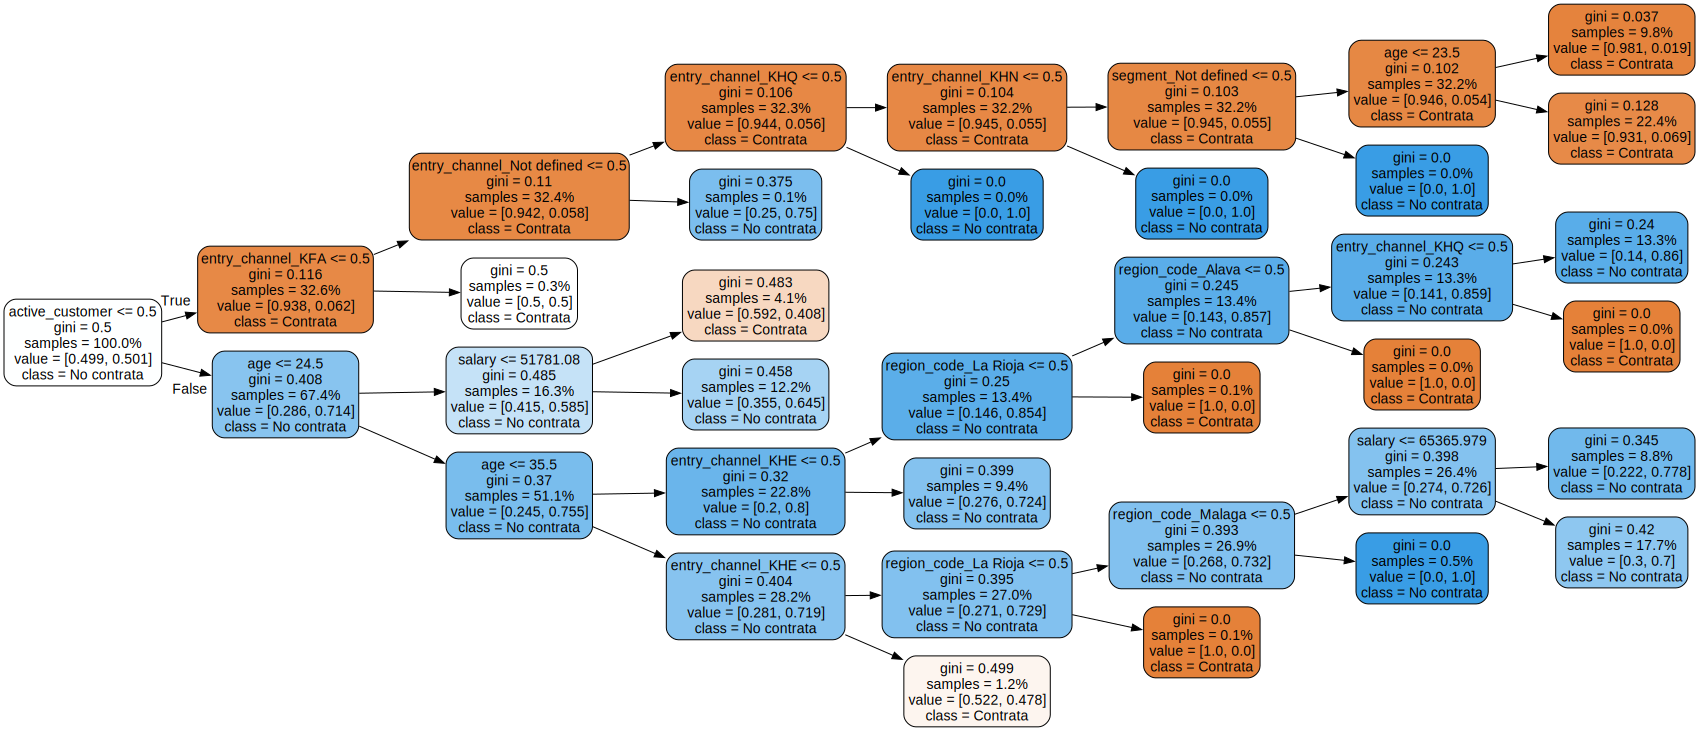

In [109]:
graphviz.Source(tree_model)

## Evaluar el modelo
### Accuracy

In [110]:
y_test_pred = pd.DataFrame(dt_basic.predict(X_test), index = y_test.index, columns = ['Predicci√≥n contrataci√≥n'])
y_test_pred.head(5)
y_test.head(5)

reg_pension_plan
722                  0
3965                 0
2819                 1
4197                 1
2066                 0

Hacemos un join para obtener la matriz con los resultados predecidos y los reales.

In [111]:
result_df = y_test.join(y_test_pred, how = 'inner')
result_df

reg_pension_plan  Predicci√≥n contrataci√≥n
722                  0                        0
3965                 0                        1
2819                 1                        0
4197                 1                        1
2066                 0                        1
...                ...                      ...
709                  0                        0
239                  1                        1
5005                 1                        1
3618                 0                        1
3618                 0                        0

[1922 rows x 2 columns]

Parece que el modelo predice contrataciones de m√°s (falsos positivos). Lo cual es mejor para estar preparados ante un exceso de clientes. Si hubiesen m√°s falsos negativos podr√≠a suponer sobrecarga de personal por exceso de clientes no previstos.

In [112]:
result_df['Success'] = (result_df['reg_pension_plan'] == result_df['Predicci√≥n contrataci√≥n'])

In [113]:
result_df.shape

(1922, 3)

In [114]:
result_df['Success'].sum()

1353

In [115]:
#accuracy
result_df['Success'].mean()

0.7039542143600416

Vemos el accuracy es de 0.72 pero usaremos otras m√©tricas de validaci√≥n m√°s complejas para ver si sale un resultado diferente.

### Confusion matrix

In [116]:
confusion_matrix = pd.crosstab(result_df['reg_pension_plan'], result_df['Predicci√≥n contrataci√≥n'])

In [117]:
1 - result_df['Success'].mean()
TN = confusion_matrix.iloc[0,0]
FP = confusion_matrix.iloc[0,1]
FN = confusion_matrix.iloc[1,0]
TP = confusion_matrix.iloc[1,1]
accuracy = (TP + TN) / (TP + TN + FN + FP)
accuracy

0.7039542143600416

Coincide los resultados de la matriz de confusi√≥n con el accuracy. Es de 0.72.


### Overfitting

In [118]:
for i in range(1,10):
  #instanciar
  dt_overfit = DecisionTreeClassifier(max_depth=i,min_samples_split=200)
  #entrenar
  dt_overfit.fit(X_train, y_train)
  #evaluar
  accuracy_train = dt_overfit.score(X_train, y_train)
  accuracy_test = dt_overfit.score(X_test, y_test)
  print(f'Profundidad del arbol {i}, acc_train: {round(accuracy_train*100,2)}, accuracy_test: {round(accuracy_test*100,2)}, overfit {round(accuracy_train*100,2) - round(accuracy_test*100,2)}')

Profundidad del arbol 1, acc_train: 78.72, accuracy_test: 79.52, overfit -0.7999999999999972
Profundidad del arbol 2, acc_train: 78.72, accuracy_test: 79.52, overfit -0.7999999999999972
Profundidad del arbol 3, acc_train: 79.53, accuracy_test: 80.13, overfit -0.5999999999999943
Profundidad del arbol 4, acc_train: 79.61, accuracy_test: 80.13, overfit -0.519999999999996
Profundidad del arbol 5, acc_train: 79.9, accuracy_test: 79.83, overfit 0.07000000000000739
Profundidad del arbol 6, acc_train: 79.95, accuracy_test: 79.95, overfit 0.0
Profundidad del arbol 7, acc_train: 79.97, accuracy_test: 79.95, overfit 0.01999999999999602
Profundidad del arbol 8, acc_train: 80.55, accuracy_test: 79.89, overfit 0.6599999999999966
Profundidad del arbol 9, acc_train: 80.66, accuracy_test: 79.83, overfit 0.8299999999999983


Nos quedamos con una profundidad de 4 ya que vemos que el acc_test y el acc_train son los m√°s elevados mientras el overfitting se mantiene con un valor bajo.

## Modelo final

Establecemos el modelo final definiendo los par√°metros de overfitting con el max_depth.

In [119]:
dt_final = DecisionTreeClassifier(max_depth=4,min_samples_split=500)
dt_final.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=500)

### Evaluar en validaci√≥n

In [120]:
dt_final.score(X_train, y_train)
dt_final.score(X_test, y_test)

0.8007334963325183

Le pasamos los datos de validaci√≥n para ver como funciona y vemos que el resultado de validaci√≥n es parecido a train y test.

In [121]:
dt_final.score(val_df_X, val_df_y)

0.785727389469822

## AUC

In [122]:
metrics.roc_auc_score(y_test,dt_final.predict_proba(X_test)[:,1])

0.8491688076054514

Obtenemos un AUC  de 0,83. Se considera un buen modelo cuando el AUC es mayor a 0,75. Probaremos a realizar el random forest para mejorarlos.üòé

## ROC Curve

Text(0, 0.5, 'TPR')

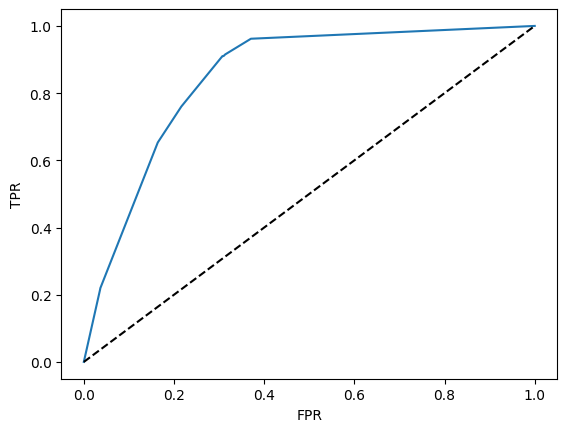

In [123]:
fpr,tpr,th = metrics.roc_curve(y_test,dt_final.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], color= 'black', linestyle = '--')
plt.xlabel('FPR')
plt.ylabel('TPR')

Tenemos TPR (Recall, ceros reales) m√°s alta, por encima de la diagonal, y FPR (verdaderos negativos). Como la curva est√° por encima de la diagonal, quiere decir que el modelo predice con m√°s aciertos (TP) que fallos (FP). Tambi√©n sabemos que el modelo es capaz de discernir con respecto al target, ya que la l√≠nea azul (ROC Curve) no se sobrepone a la diagonal negra.

# Modelos alternativos a DecisionTreeClassifier

## Random Forest

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
rf_basic = RandomForestClassifier(n_estimators = 100, max_depth = 4, random_state = 42)

Entrenamos el modelo

In [126]:
rf_basic.fit(X = X_train, y = np.ravel(y_train))

RandomForestClassifier(max_depth=4, random_state=42)

Evaluamos el modelo. -- model.predict_proba() nos dice el porcentaje de probabilidad de predecir la clase del target

In [127]:
metrics.roc_auc_score(y_test,rf_basic.predict_proba(X_test)[:,1])
rf_basic.estimators_[1]

DecisionTreeClassifier(max_depth=4, max_features='sqrt',
                       random_state=1273642419)

In [128]:
tree_data_rf0 = export_graphviz(
    decision_tree = rf_basic.estimators_[2],
    out_file=None,
    max_depth=8,
    feature_names=X_train.columns,
    class_names=['Contrata', 'No contrata'],
    filled=True,
    impurity=True,
    proportion=True,
    rotate=True,
    rounded=True
)

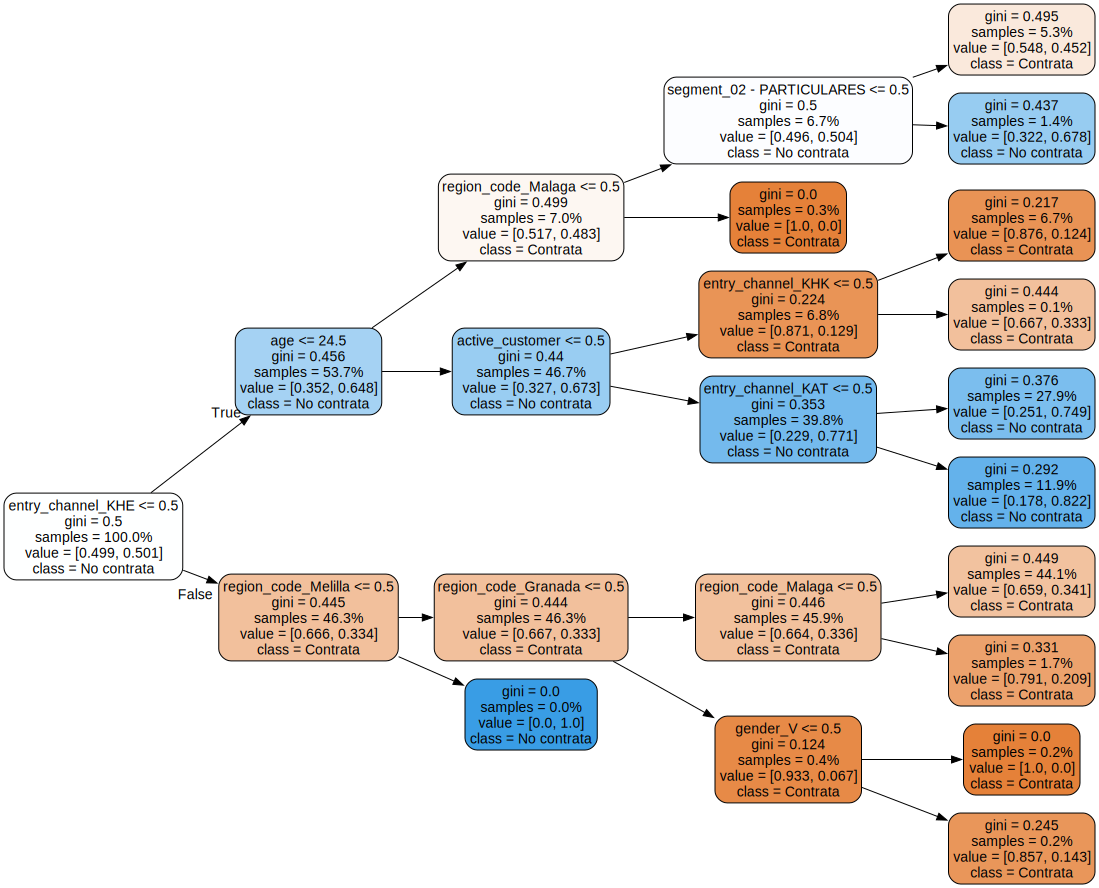

In [129]:
graphviz.Source(tree_data_rf0)

In [130]:
rf_basic.predict_proba(X_test)[:,1]
pd.Series(rf_basic.feature_importances_, index = X_test.columns).sort_values(ascending = False).head(20)

active_customer               0.389691
age                           0.125326
entry_channel_KHE             0.112098
segment_02 - PARTICULARES     0.065614
entry_channel_KFC             0.051932
segment_03 - UNIVERSITARIO    0.048261
entry_channel_KAT             0.046143
entry_channel_KHD             0.037857
region_code_Madrid            0.028211
salary                        0.017149
region_code_Badajoz           0.010102
entry_channel_KFA             0.009297
gender_H                      0.005793
region_code_Valladolid        0.004685
gender_V                      0.003832
region_code_La Coru√±a         0.003568
region_code_Caceres           0.002719
region_code_Castellon         0.002513
region_code_Pontevedra        0.002137
entry_channel_KHM             0.002027
dtype: float64

Parece ser que la columna active_customer es la mas relevante en cuanto a la predicci√≥n del target

In [131]:
rf = RandomForestClassifier(n_estimators=100, max_depth=4, min_samples_split=500, random_state=42)
rf.fit(X_train, np.ravel(y_train))

RandomForestClassifier(max_depth=4, min_samples_split=500, random_state=42)

Lanzamos el modelo sobre el conjunto de test para que haga sus predicciones

In [132]:
y_score = pd.DataFrame(rf.predict_proba(X_test)[:,1], index=y_test.index, columns=['reg_pension_plan_score'])

In [133]:
y_score

reg_pension_plan_score
722                 0.247463
3965                0.468529
2819                0.292456
4197                0.700373
2066                0.581486
...                      ...
4434                0.624687
709                 0.226941
239                 0.490671
5005                0.672960
3618                0.235736

[1636 rows x 1 columns]

Comparamos las predicciones de y_score con los valores reales de y_test juntandolos en una tabla. En este caso, como hemos hecho un predict proba.

In [134]:
results_df = y_test.join(y_score)

In [135]:
results_df.head()

reg_pension_plan  reg_pension_plan_score
722                  0                0.247463
3965                 0                0.468529
2819                 1                0.292456
4197                 1                0.700373
2066                 0                0.581486

### AUC Score

In [136]:
print(metrics.roc_auc_score(results_df['reg_pension_plan'], results_df['reg_pension_plan_score']))

0.7299593068080426


### ROC Curve

In [137]:
fpr, tpr, _ = metrics.roc_curve(results_df['reg_pension_plan'], results_df['reg_pension_plan_score'])

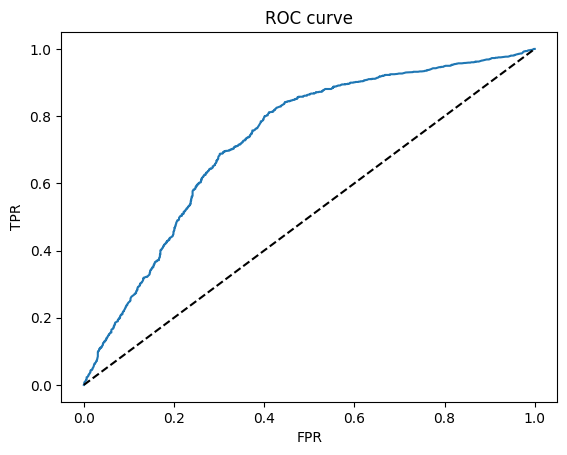

In [138]:
plt.clf()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

El ROC Curve nos dice que se predicen m√°s TP que FP y que adem√°s el modelo es capaz de discernir entre las caracter√≠sticas para predecir el target.

Con el ramdom forest no hemos conseguigo mejorar los par√°metros de validaci√≥n de AUC y ROC curve.

In [139]:
results_df['reg_pension_plan_score'].nunique()

1191

In [140]:
results_df['Decile'] = pd.qcut(results_df['reg_pension_plan_score'], q=10)

In [141]:
results_df.head(10)

reg_pension_plan  reg_pension_plan_score          Decile
722                  0                0.247463  (0.246, 0.267]
3965                 0                0.468529  (0.456, 0.493]
2819                 1                0.292456  (0.267, 0.428]
4197                 1                0.700373  (0.683, 0.705]
2066                 0                0.581486  (0.493, 0.632]
2542                 0                0.610158  (0.493, 0.632]
4219                 0                0.429187  (0.428, 0.456]
4120                 1                0.683338  (0.683, 0.705]
2085                 1                0.687257  (0.683, 0.705]
4200                 0                0.648473  (0.632, 0.665]

In [142]:
results_summary_table = results_df.pivot_table(index='Decile', values='reg_pension_plan', aggfunc=[len, 'sum', 'mean'], observed=False).sort_index(ascending=False)

In [143]:
results_summary_table.columns = ['Cases', 'Responses', 'Accuracy']

In [144]:
results_summary_table

Cases  Responses  Accuracy
Decile                                    
(0.683, 0.705]    192        140  0.729167
(0.675, 0.683]    193        131  0.678756
(0.665, 0.675]    192        131  0.682292
(0.632, 0.665]    191        134  0.701571
(0.493, 0.632]    193        126  0.652850
(0.456, 0.493]    192        103  0.536458
(0.428, 0.456]    192         70  0.364583
(0.267, 0.428]    192         47  0.244792
(0.246, 0.267]    188         33  0.175532
(0.22, 0.246]     197         41  0.208122

In [145]:
def get_gain_table(model, X_test, y_test):
    y_score = pd.DataFrame(model.predict_proba(X_test)[:,1], index=y_test.index, columns=['Score'])
    results_df = y_test.join(y_score)
    results_df['Decile'] = pd.qcut(results_df['Score'], q=10)
    results_summary_table = results_df.pivot_table(index='Decile', values=y_test.columns, aggfunc=[len, 'sum', 'mean'], observed=False).sort_index(ascending=False)
    results_summary_table.columns = ['Cases', 'Responses', 'Accuracy']
    results_summary_table['Pct. Cases'] = results_summary_table['Cases'] / results_summary_table['Cases'].sum()
    results_summary_table['Pct. Responses'] = results_summary_table['Responses'] / results_summary_table['Responses'].sum()
    results_summary_table['Cum. Cases'] = results_summary_table['Cases'].cumsum()
    results_summary_table['Cum. Responses'] = results_summary_table['Responses'].cumsum()
    results_summary_table['Cum. Pct. Cases'] = results_summary_table['Pct. Cases'].cumsum()
    results_summary_table['Cum. Pct. Responses'] = results_summary_table['Pct. Responses'].cumsum()
    return results_summary_table

In [146]:
rf_results_summary_table = get_gain_table(rf, X_test, y_test)

In [147]:
rf_results_summary_table

Cases  Responses  Accuracy  Pct. Cases  Pct. Responses  \
Decile                                                                   
(0.683, 0.705]    192        140  0.729167    0.099896        0.146444   
(0.675, 0.683]    193        131  0.678756    0.100416        0.137029   
(0.665, 0.675]    192        131  0.682292    0.099896        0.137029   
(0.632, 0.665]    191        134  0.701571    0.099376        0.140167   
(0.493, 0.632]    193        126  0.652850    0.100416        0.131799   
(0.456, 0.493]    192        103  0.536458    0.099896        0.107741   
(0.428, 0.456]    192         70  0.364583    0.099896        0.073222   
(0.267, 0.428]    192         47  0.244792    0.099896        0.049163   
(0.246, 0.267]    188         33  0.175532    0.097815        0.034519   
(0.22, 0.246]     197         41  0.208122    0.102497        0.042887   

                Cum. Cases  Cum. Responses  Cum. Pct. Cases  \
Decile                                                        
(0.683, 0.705]         192             140         0.099896   
(0.675, 0.683]         385             271         0.200312   
(0.665, 0.675]         577             402         0.300208   
(0.632, 0.665]         768             536         0.399584   
(0.493, 0.632]         961             662         0.500000   
(0.456, 0.493]        1153             765         0.599896   
(0.428, 0.456]        1345             835         0.699792   
(0.267, 0.428]        1537             882         0.799688   
(0.246, 0.267]        1725             915         0.897503   
(0.22, 0.246]         1922             956         1.000000   

                Cum. Pct. Responses  
Decile                               
(0.683, 0.705]             0.146444  
(0.675, 0.683]             0.283473  
(0.665, 0.675]             0.420502  
(0.632, 0.665]             0.560669  
(0.493, 0.632]             0.692469  
(0.456, 0.493]             0.800209  
(0.428, 0.456]             0.873431  
(0.267, 0.428]             0.922594  
(0.246, 0.267]             0.957113  
(0.22, 0.246]              1.000000

In [148]:
rf_basic.score(X_train, y_train)

0.7669724770642202

In [149]:
rf_basic.score(X_test, y_test)

0.7781173594132029

In [150]:
rf_basic.score(val_df_X, val_df_y)

0.7675655842964594

## Resultados

### Visulaizaci√≥n del dataframe resultante

In [151]:
rf_results_summary_table

Cases  Responses  Accuracy  Pct. Cases  Pct. Responses  \
Decile                                                                   
(0.683, 0.705]    192        140  0.729167    0.099896        0.146444   
(0.675, 0.683]    193        131  0.678756    0.100416        0.137029   
(0.665, 0.675]    192        131  0.682292    0.099896        0.137029   
(0.632, 0.665]    191        134  0.701571    0.099376        0.140167   
(0.493, 0.632]    193        126  0.652850    0.100416        0.131799   
(0.456, 0.493]    192        103  0.536458    0.099896        0.107741   
(0.428, 0.456]    192         70  0.364583    0.099896        0.073222   
(0.267, 0.428]    192         47  0.244792    0.099896        0.049163   
(0.246, 0.267]    188         33  0.175532    0.097815        0.034519   
(0.22, 0.246]     197         41  0.208122    0.102497        0.042887   

                Cum. Cases  Cum. Responses  Cum. Pct. Cases  \
Decile                                                        
(0.683, 0.705]         192             140         0.099896   
(0.675, 0.683]         385             271         0.200312   
(0.665, 0.675]         577             402         0.300208   
(0.632, 0.665]         768             536         0.399584   
(0.493, 0.632]         961             662         0.500000   
(0.456, 0.493]        1153             765         0.599896   
(0.428, 0.456]        1345             835         0.699792   
(0.267, 0.428]        1537             882         0.799688   
(0.246, 0.267]        1725             915         0.897503   
(0.22, 0.246]         1922             956         1.000000   

                Cum. Pct. Responses  
Decile                               
(0.683, 0.705]             0.146444  
(0.675, 0.683]             0.283473  
(0.665, 0.675]             0.420502  
(0.632, 0.665]             0.560669  
(0.493, 0.632]             0.692469  
(0.456, 0.493]             0.800209  
(0.428, 0.456]             0.873431  
(0.267, 0.428]             0.922594  
(0.246, 0.267]             0.957113  
(0.22, 0.246]              1.000000

### Ranking de clientes actuales propensos a compra

Cogemos los clientes de la √∫ltima particion


In [152]:
df_con_reg_merged

pk_cid pk_partition entry_channel  active_customer  \
0        1050611   2018-01-01           KHE                0   
1        1050612   2018-01-01           KHE                0   
2        1050613   2018-01-01           KHD                0   
3        1050614   2018-01-01           KHE                1   
4        1050615   2018-01-01           KHE                0   
...          ...          ...           ...              ...   
1047514  1018682   2019-05-01           KAT                0   
1047515  1018679   2019-05-01           KFA                1   
1047516  1018676   2019-05-01           KFA                0   
1047517  1018675   2019-05-01           KFC                0   
1047518  1018723   2019-05-01           KFC                0   

                    segment  region_code gender  age     salary  \
0        03 - UNIVERSITARIO           13      V   23   35548.74   
1        03 - UNIVERSITARIO           13      V   23  122179.11   
2        03 - UNIVERSITARIO           50      H   22  119775.54   
3        03 - UNIVERSITARIO           50      V   23      -1.00   
4        03 - UNIVERSITARIO           45      H   23   22220.04   
...                     ...          ...    ...  ...        ...   
1047514   02 - PARTICULARES           28      V   88   35310.57   
1047515   02 - PARTICULARES           28      V   34   61180.11   
1047516   02 - PARTICULARES           28      H   74   63867.48   
1047517   02 - PARTICULARES           29      H   15      -1.00   
1047518   02 - PARTICULARES           43      V   42      -1.00   

         reg_pension_plan  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  
...                   ...  
1047514                 0  
1047515                 0  
1047516                 0  
1047517                 0  
1047518                 0  

[1047519 rows x 10 columns]

In [153]:
df_ranking=df_merged.loc[df_merged['pk_partition'] =='2019-05']

Adaptamos el dataframe para el ranking con las mismas columnas del modelo. Para ello cambiamos el region_code por el nombre de la provicia.

In [154]:
# Diccionario que mapea los c√≥digos de regi√≥n a nombres
codigo_a_nombre = {
    1: 'Alava',
    2: 'Albacete',
    3: 'Alicante',
    4: 'Almeria',
    5: 'Avila',
    6: 'Badajoz',
    7: 'Islas Baleares',
    8: 'Barcelona',
    9: 'Burgos',
    10: 'Caceres',
    11: 'Cadiz',
    12: 'Castellon',
    13: 'Ciudad Real',
    14: 'Cordoba',
    15: 'La Coru√±a',
    16: 'Cuenca',
    17: 'Gerona',
    18: 'Granada',
    19: 'Guadalajara',
    20: 'Guipuzcoa',
    21: 'Huelva',
    22: 'Huesca',
    23: 'Jaen',
    24: 'Leon',
    25: 'Lerida',
    26: 'La Rioja',
    27: 'Lugo',
    28: 'Madrid',
    29: 'Malaga',
    30: 'Murcia',
    31: 'Navarra',
    32: 'Orense',
    33: 'Asturias',
    34: 'Palencia',
    35: 'Las Palmas',
    36: 'Pontevedra',
    37: 'Salamanca',
    38: 'Santa Cruz de Tenerife',
    39: 'Cantabria',
    40: 'Segovia',
    41: 'Sevilla',
    42: 'Soria',
    43: 'Tarragona',
    44: 'Teruel',
    45: 'Toledo',
    46: 'Valencia',
    47: 'Valladolid',
    48: 'Vizcaya',
    49: 'Zamora',
    50: 'Zaragoza',
    51: 'Ceuta',
    52: 'Melilla'
}

# Reemplaza los valores en la columna 'region_code' usando el diccionario
df_ranking['region_code'] = df_ranking['region_code'].replace(codigo_a_nombre)

# Muestra el DataFrame para verificar los cambios
print(df_ranking)

          pk_cid pk_partition entry_channel  active_customer  \
5516831   657826   2019-05-01        Others                1   
5516832   657817   2019-05-01   Not defined                0   
5516833   657986   2019-05-01        Others                1   
5516834   657905   2019-05-01           KAT                1   
5516835   657336   2019-05-01           KAT                1   
...          ...          ...           ...              ...   
5959572  1166765   2019-05-01           KHE                0   
5959573  1166764   2019-05-01           KHE                0   
5959574  1166763   2019-05-01           KHE                1   
5959575  1166789   2019-05-01           KHE                0   
5959576  1550586   2019-05-01   Not defined                1   

                    segment region_code gender  age     salary  
5516831   02 - PARTICULARES      Lerida      H   44   54493.38  
5516832         Not defined   Barcelona      V   32      -1.00  
5516833   02 - PARTICULARES     Sevi

C:\Users\odoto\AppData\Local\Temp\ipykernel_13072\1570508301.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ranking['region_code'] = df_ranking['region_code'].replace(codigo_a_nombre)


Definimos el index con el pk_cid porque nos servir√° posteriormente para identificar a los clientes incluidos en el ranking, as√≠ como su cluster.

In [155]:
df_ranking.set_index('pk_cid', inplace=True)

In [156]:
df_ranking

pk_partition entry_channel  active_customer             segment  \
pk_cid                                                                    
657826    2019-05-01        Others                1   02 - PARTICULARES   
657817    2019-05-01   Not defined                0         Not defined   
657986    2019-05-01        Others                1   02 - PARTICULARES   
657905    2019-05-01           KAT                1            01 - TOP   
657336    2019-05-01           KAT                1   02 - PARTICULARES   
...              ...           ...              ...                 ...   
1166765   2019-05-01           KHE                0  03 - UNIVERSITARIO   
1166764   2019-05-01           KHE                0  03 - UNIVERSITARIO   
1166763   2019-05-01           KHE                1   02 - PARTICULARES   
1166789   2019-05-01           KHE                0  03 - UNIVERSITARIO   
1550586   2019-05-01   Not defined                1         Not defined   

        region_code gender  age     salary  
pk_cid                                      
657826       Lerida      H   44   54493.38  
657817    Barcelona      V   32      -1.00  
657986      Sevilla      H   39  100993.17  
657905       Madrid      H   85  154059.09  
657336       Madrid      V   38      -1.00  
...             ...    ...  ...        ...  
1166765    Zaragoza      V   22   43912.17  
1166764    La Rioja      V   23   23334.99  
1166763    Zaragoza      H   47      -1.00  
1166789    Zaragoza      H   22  199592.82  
1550586      Madrid      H   37      -1.00  

[442746 rows x 8 columns]

In [157]:
df_ranking.index.name = None

In [158]:
df_ranking

pk_partition entry_channel  active_customer             segment  \
657826    2019-05-01        Others                1   02 - PARTICULARES   
657817    2019-05-01   Not defined                0         Not defined   
657986    2019-05-01        Others                1   02 - PARTICULARES   
657905    2019-05-01           KAT                1            01 - TOP   
657336    2019-05-01           KAT                1   02 - PARTICULARES   
...              ...           ...              ...                 ...   
1166765   2019-05-01           KHE                0  03 - UNIVERSITARIO   
1166764   2019-05-01           KHE                0  03 - UNIVERSITARIO   
1166763   2019-05-01           KHE                1   02 - PARTICULARES   
1166789   2019-05-01           KHE                0  03 - UNIVERSITARIO   
1550586   2019-05-01   Not defined                1         Not defined   

        region_code gender  age     salary  
657826       Lerida      H   44   54493.38  
657817    Barcelona      V   32      -1.00  
657986      Sevilla      H   39  100993.17  
657905       Madrid      H   85  154059.09  
657336       Madrid      V   38      -1.00  
...             ...    ...  ...        ...  
1166765    Zaragoza      V   22   43912.17  
1166764    La Rioja      V   23   23334.99  
1166763    Zaragoza      H   47      -1.00  
1166789    Zaragoza      H   22  199592.82  
1550586      Madrid      H   37      -1.00  

[442746 rows x 8 columns]

In [159]:
object_columns = [col for col in df_ranking if df_ranking[col].dtype.kind == 'O']

In [160]:
for col in object_columns:
    _dummy_dataset = pd.get_dummies(df_ranking[col], prefix=col)
    df_ranking = pd.concat([df_ranking,_dummy_dataset],axis=1)
    df_ranking.drop([col],axis=1, inplace=True)

In [161]:
df_ranking.info()


<class 'pandas.core.frame.DataFrame'>
Index: 442746 entries, 657826 to 1550586
Data columns (total 74 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   pk_partition                        442746 non-null  datetime64[ns]
 1   active_customer                     442746 non-null  int32         
 2   age                                 442746 non-null  int64         
 3   salary                              442746 non-null  float64       
 4   entry_channel_KAT                   442746 non-null  bool          
 5   entry_channel_KFA                   442746 non-null  bool          
 6   entry_channel_KFC                   442746 non-null  bool          
 7   entry_channel_KHD                   442746 non-null  bool          
 8   entry_channel_KHE                   442746 non-null  bool          
 9   entry_channel_KHK                   442746 non-null  bool          
 10  entry_c

In [162]:
bool_columns = [col for col in df_ranking if df_ranking[col].dtype.kind == 'b']

In [163]:
for col in bool_columns:
    if col in df_ranking:
        df_ranking[col]=  df_ranking[col].astype('int32')

In [164]:
df_ranking.drop(columns=['pk_partition'], axis=1, inplace=True)

In [165]:
df_ranking.head()

active_customer  age     salary  entry_channel_KAT  entry_channel_KFA  \
657826                1   44   54493.38                  0                  0   
657817                0   32      -1.00                  0                  0   
657986                1   39  100993.17                  0                  0   
657905                1   85  154059.09                  1                  0   
657336                1   38      -1.00                  1                  0   

        entry_channel_KFC  entry_channel_KHD  entry_channel_KHE  \
657826                  0                  0                  0   
657817                  0                  0                  0   
657986                  0                  0                  0   
657905                  0                  0                  0   
657336                  0                  0                  0   

        entry_channel_KHK  entry_channel_KHM  ...  region_code_Tarragona  \
657826                  0                  0  ...                      0   
657817                  0                  0  ...                      0   
657986                  0                  0  ...                      0   
657905                  0                  0  ...                      0   
657336                  0                  0  ...                      0   

        region_code_Teruel  region_code_Toledo  region_code_Valencia  \
657826                   0                   0                     0   
657817                   0                   0                     0   
657986                   0                   0                     0   
657905                   0                   0                     0   
657336                   0                   0                     0   

        region_code_Valladolid  region_code_Vizcaya  region_code_Zamora  \
657826                       0                    0                   0   
657817                       0                    0                   0   
657986                       0                    0                   0   
657905                       0                    0                   0   
657336                       0                    0                   0   

        region_code_Zaragoza  gender_H  gender_V  
657826                     0         1         0  
657817                     0         0         1  
657986                     0         1         0  
657905                     0         1         0  
657336                     0         0         1  

[5 rows x 73 columns]

Finalmente hacemos un predict_proba para obtener el ranking de clientes propensos a la compra de pension plan.

In [166]:
clients_ranking = pd.DataFrame(rf.predict_proba(df_ranking)[:,1], index=df_ranking.index, columns=['reg_pension_plan_score'])

In [167]:
clients_ranking 

reg_pension_plan_score
657826                 0.656460
657817                 0.531959
657986                 0.664112
657905                 0.686535
657336                 0.684194
...                         ...
1166765                0.252365
1166764                0.266715
1166763                0.564639
1166789                0.240124
1550586                0.669733

[442746 rows x 1 columns]

In [168]:
clients_ranking=clients_ranking.sort_values(by='reg_pension_plan_score', ascending=False)

In [169]:
clients_ranking

reg_pension_plan_score
1158122                0.705878
1214101                0.705417
1133697                0.705417
1101253                0.705417
1270720                0.705417
...                         ...
1179414                0.220799
1078482                0.220799
1294165                0.220799
1282833                0.220799
1180542                0.220799

[442746 rows x 1 columns]

Miramos cuantos clientes superan un rango aceptable de probabilidad de compra que establecemos como 65%.

In [170]:
len(clients_ranking.loc[clients_ranking['reg_pension_plan_score']>0.65])

79564

In [171]:
clients_ranking.mean()

reg_pension_plan_score    0.425212
dtype: float64

In [172]:
clients_ranking=clients_ranking.loc[clients_ranking['reg_pension_plan_score']>0.65]

In [173]:
index_df = clients_ranking.index

In [174]:
df_ranking = pd.DataFrame(index_df)

In [175]:
df_ranking.to_csv(DATA_PATH+'df_ranking.csv', index=False)